aggiornamento Bayesiano sulla probabilità di SPAM:

Osservazione 1: 'win'  ->  P(Spam) = 0.8235
Osservazione 2: 'meeting'  ->  P(Spam) = 0.5385
Osservazione 3: 'project'  ->  P(Spam) = 0.1573
Osservazione 4: 'offer'  ->  P(Spam) = 0.6914
Osservazione 5: 'prize'  ->  P(Spam) = 0.9573
Osservazione 6: 'win'  ->  P(Spam) = 0.9937

Risultato finale:
L'email è probabilmente SPAM (P = 99.37%)
Osservazione 1: 'win'  ->  P(Spam) = 0.9991
Osservazione 2: 'meeting'  ->  P(Spam) = 0.9964
Osservazione 3: 'project'  ->  P(Spam) = 0.9777
Osservazione 4: 'offer'  ->  P(Spam) = 0.9981
Osservazione 5: 'prize'  ->  P(Spam) = 0.9998
Osservazione 6: 'win'  ->  P(Spam) = 1.0000

Risultato finale:
L'email è probabilmente SPAM (P = 100.00%)
Test 1: + -> P(Malattia) = 0.2730
Test 2: - -> P(Malattia) = 0.0307
Test 3: + -> P(Malattia) = 0.3678
Test 4: + -> P(Malattia) = 0.9146
Test 5: - -> P(Malattia) = 0.4741

Probabilità finale: 0.47


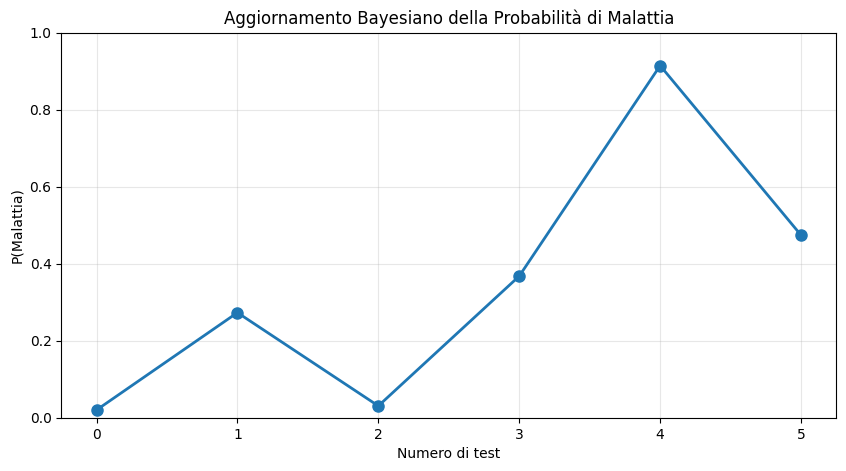

In [28]:
import random
import matplotlib.pyplot as plt

# Esercizio 1
# Scrivi il codice di Aggiornamento Bayesiano sequenziale
# Stima della probabilità di una email di Spam e se supera la soglia predefenita (ad es 0.7)
# scrivi se è o non è una mail di Spam
# Prior: P(spam)= 0.4
# Osserviamo una delle parole in una email ed aggiorniamo la probabilità
def teorema_bayes(p_a_dato_b, p_b, p_a):
    """
    Calcola P(B|A)=P(A|B)*P(B) / P(A)
    
    Arg
    p_a_dato_b : P(A|B) - verosimiglianza
    p_b : P(B) - probabilità a priori
    p_a : P(A) - evidenza

    Returns
    P(B|A) - probabilità a posteriori
    """
    return(p_a_dato_b*p_b) / p_a


def teorema_bayes_completo(p_a_dato_b, p_b, p_a_dato_non_b):
    """
    Calcola P(B|A) usando la legge di probabilità totale per P(A)
    """
    p_non_b = 1-p_b
    p_a = p_a_dato_b*p_b + p_a_dato_non_b*p_non_b
    return teorema_bayes(p_a_dato_b, p_b, p_a)
# Likelihood P(parola | Spam) e P(parola | Non-Spam)
lik_spam = {
    "win":   0.7,
    "meeting":0.05,
    "offer": 0.6,
    "hello": 0.02,
    "prize": 0.8,
    "project":0.04,
    "update": 0.10,
    "invoice": 0.01
}

lik_nonspam = {
    "win":   0.1,
    "meeting":0.2,
    "offer": 0.05,
    "hello": 0.3,
    "prize": 0.08,
    "project":0.25,
    "update": 0.15,
    "invoice": 0.4
}

# sequenza parole osservate
parole = ["win", "meeting", "project", "offer", "prize", "win"]

# Prior iniziale
p_spam = 0.4
soglia=0.7

print("aggiornamento Bayesiano sulla probabilità di SPAM:\n")

for i, parola in enumerate(parole, 1):

    p_parola_spam = lik_spam[parola]
    p_parola_nonspam = lik_nonspam[parola]

    p_spam = teorema_bayes_completo(p_parola_spam, p_spam, p_parola_nonspam)

    print(f"Osservazione {i}: '{parola}'  ->  P(Spam) = {p_spam:.4f}")

print("\nRisultato finale:")

if p_spam >= soglia:
    print(f"L'email è probabilmente SPAM (P = {p_spam:.2%})")
else:
    print(f"L'email NON sembra spam (P = {p_spam:.2%})")





# Esercizio 2
# Applicando il codice dell'esercizio precedente, modifica la sequenza delle parole
# e verifica come varia la probabilità di spam

# mescolare le parole 
parole_shuffle = parole.copy()
random.shuffle(parole_shuffle)


for i, parola in enumerate(parole, 1):

    p_parola_spam = lik_spam[parola]
    p_parola_nonspam = lik_nonspam[parola]

    p_spam = teorema_bayes_completo(p_parola_spam, p_spam, p_parola_nonspam)

    print(f"Osservazione {i}: '{parola}'  ->  P(Spam) = {p_spam:.4f}")

print("\nRisultato finale:")

if p_spam >= soglia:
    print(f"L'email è probabilmente SPAM (P = {p_spam:.2%})")
else:
    print(f"L'email NON sembra spam (P = {p_spam:.2%})")

# Esercizio 3
# Scrivi il codice di Aggiornamento Bayesiano sequenziale
# che stima della probabilità che un paziente sia malato o sano in funzione
# del risultato di una serie di esami che danno valore positivo o negativo
# ---------------------------------------------------------
# Scenario clinico: un paziente esegue una serie di test
# ---------------------------------------------------------



# Prevalenza (prior): P(Malattia)
p_malattia = 0.02   # 2%

# Test diagnostico (uguale per tutti i test)
sensibilita = 0.92               # P(Test+ | Malato)
specificita = 0.95               # P(Test- | Sano)
falso_positivo = 1 - specificita # P(Test+ | Sano)
falso_negativo = 1 - sensibilita # P(Test- | Malato)

# Sequenza reale dei test effettuati
test = ['+', '-', '+', '+', '-']

# Storia della probabilità da plottare
storia_probabilita = [p_malattia]

for i,risultato in enumerate(test,1):
   if risultato=="+" :
       p_a_dato_malato=sensibilita
       p_a_dato_sano= falso_positivo
   else:
       p_a_dato_malato=falso_negativo
       p_a_dato_sano= specificita 
   p_malattia = teorema_bayes_completo(p_a_dato_malato, p_malattia, p_a_dato_sano)

    #salva la probabilità 
   storia_probabilita.append(p_malattia)

   print(f"Test {i}: {risultato} -> P(Malattia) = {p_malattia:.4f}")

print("\nProbabilità finale:", round(p_malattia, 2))


# =============================
#  GRAFICO
# =============================

plt.figure(figsize=(10,5))
plt.plot(storia_probabilita, marker='o', linewidth=2, markersize=8)
plt.title("Aggiornamento Bayesiano della Probabilità di Malattia")
plt.xlabel("Numero di test")
plt.ylabel("P(Malattia)")
plt.grid(alpha=0.3)
plt.ylim(0, 1)
plt.show()
